In [24]:
import pandas as pd

df1 = pd.read_csv('nfhs_4.csv')
df2 = pd.read_csv('nfhs_5.csv')

# 2. Merge the dataframes
# Replace 'common_column_name' with the name of the column you want to join on
# how='inner' keeps only rows that match in both files
merged_df = pd.merge(df1, df2, on='district', how='inner')

# 3. Save the merged file as 'final.csv'
# index=False prevents pandas from adding a new row number column
merged_df.to_csv('nfhs.csv', index=False)

print("Files merged successfully and saved to final.csv")

Files merged successfully and saved to final.csv


In [25]:
import pandas as pd

df1 = pd.read_csv('nfhs.csv')
df2 = pd.read_csv('LFPR_final.csv')

# 2. Merge the dataframes
# Replace 'common_column_name' with the name of the column you want to join on
# how='inner' keeps only rows that match in both files
merged_df = pd.merge(df1, df2, on='district', how='inner')

# 3. Save the merged file as 'final.csv'
# index=False prevents pandas from adding a new row number column
merged_df.to_csv('final.csv', index=False)

print("Files merged successfully and saved to final.csv")

Files merged successfully and saved to final.csv


In [26]:
import pandas as pd

df1 = pd.read_csv('nfhs_dv.csv')
df2 = pd.read_csv('final.csv')

# 2. Merge the dataframes
# Replace 'common_column_name' with the name of the column you want to join on
# how='inner' keeps only rows that match in both files
merged_df = pd.merge(df1, df2, on='district', how='inner')

# 3. Save the merged file as 'final.csv'
# index=False prevents pandas from adding a new row number column
merged_df.to_csv('data.csv', index=False)

print("Files merged successfully and saved to data.csv")

Files merged successfully and saved to data.csv


In [3]:
df = pd.read_csv('data.csv')

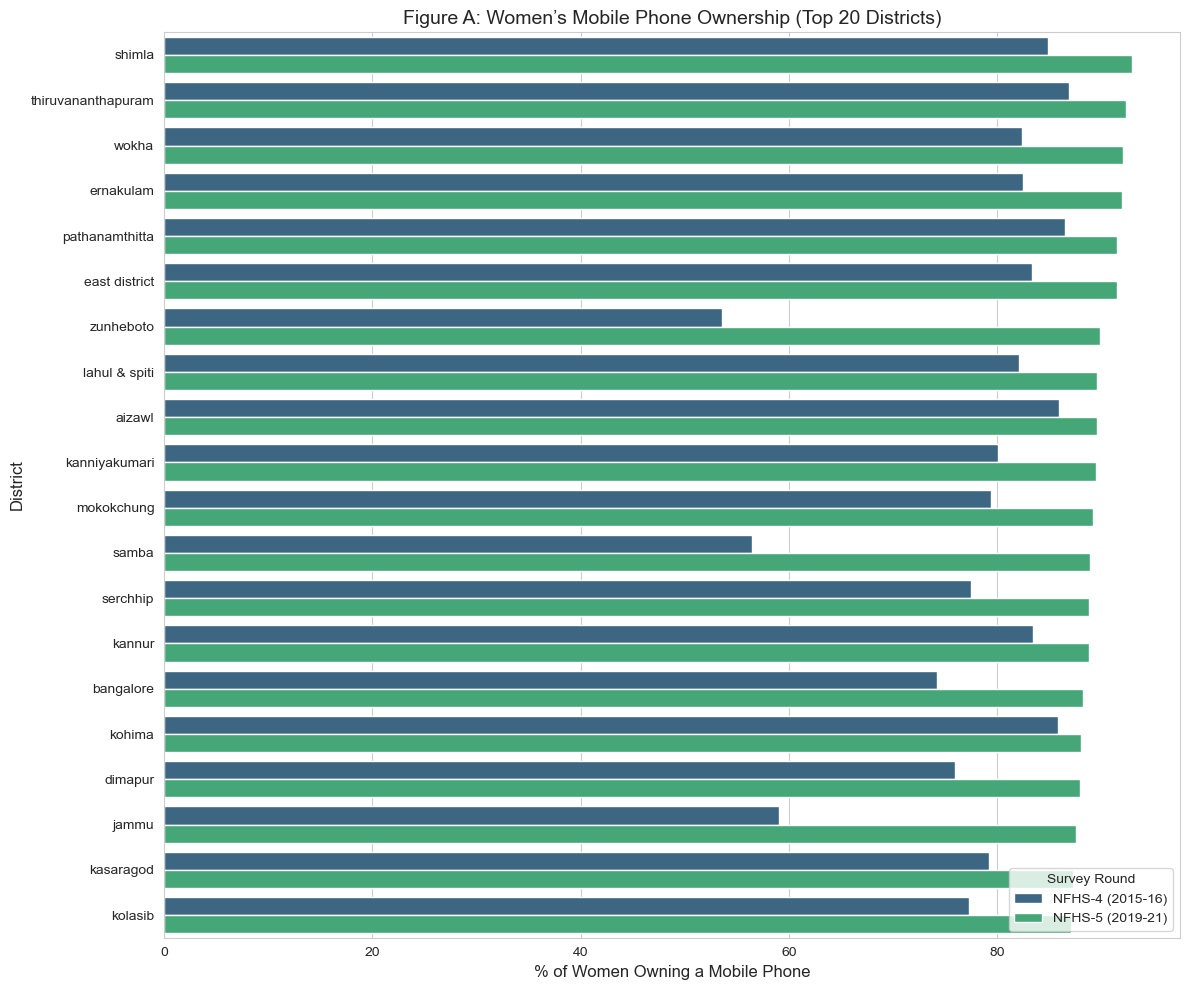

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


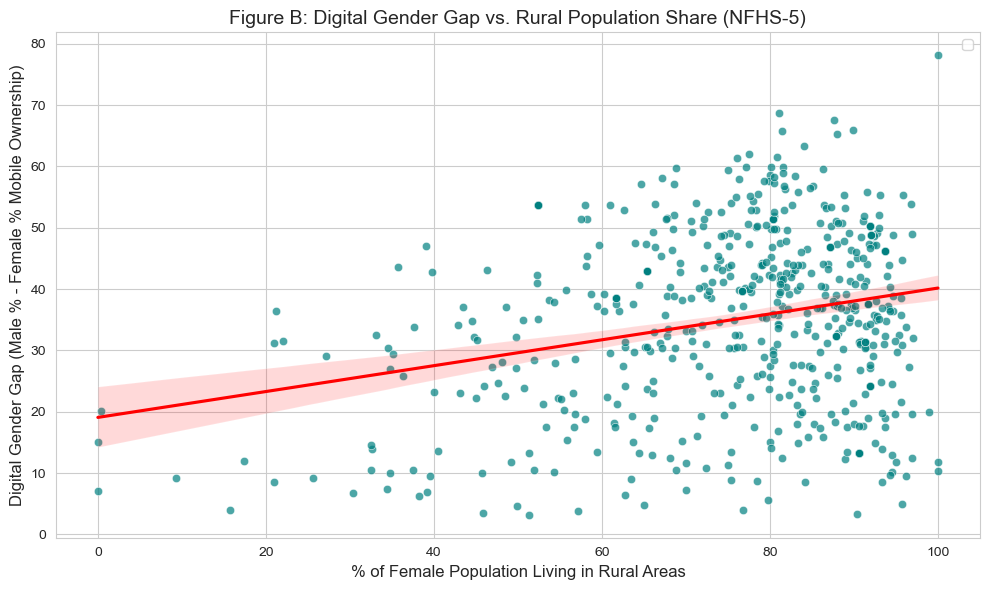

C:\Users\Soumya Pandey\AppData\Local\Temp\ipykernel_31224\1040742922.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


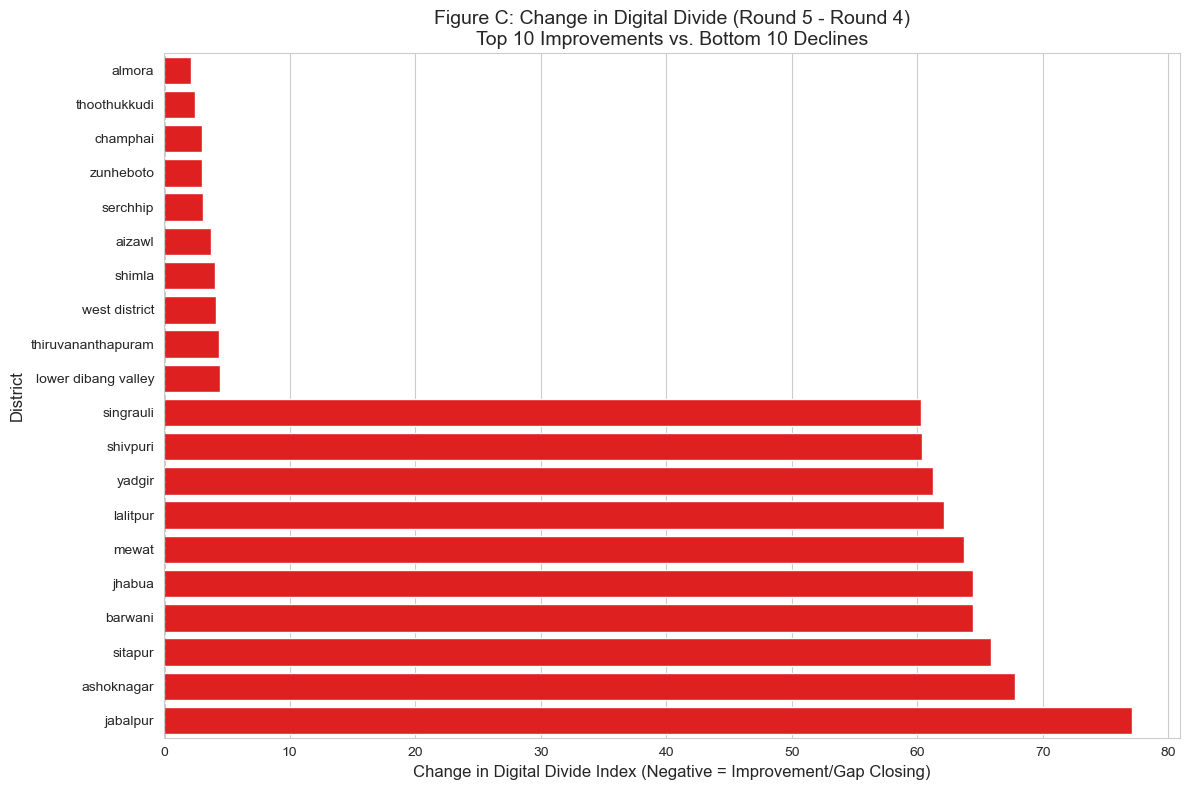

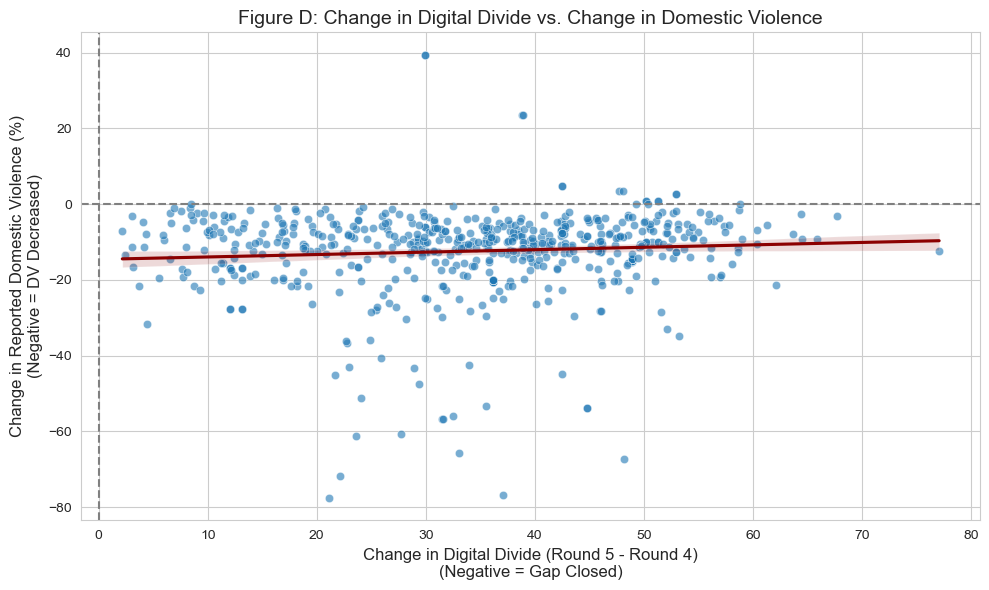

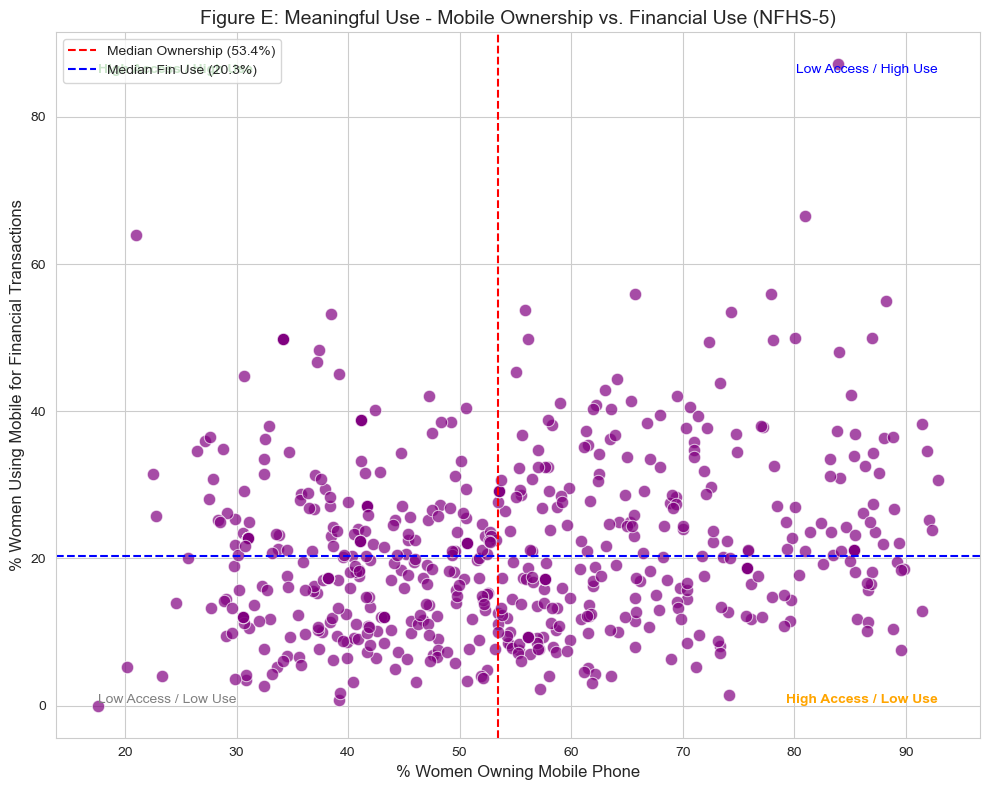

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure standard plot style
sns.set_style("whitegrid")

# --- DATA PREPARATION ---

# 1. Calculate Digital Gender Gap (Mobile Ownership) for NFHS-5
# Gap = Male % - Female %
df['dgg_mobile_5'] = df['m_pct_owns_mobile_5'] - df['f_pct_has_mobile_5']

# 2. Calculate "Internet Use Gap" / Digital Divide Change as requested
# Formula: Digital Divide 5 - Digital Divide 4
# Note: Ensure these two columns are on the same scale (e.g., both 0-100 or both 0-1). 
# If 'score' is 0-1 and 'gap' is 0-100, you might need to multiply score by 100. 
# I am assuming they are on the same scale here.
df['delta_digital_divide'] = df['digital_gender_gap_5'] - df['digital_gender_gap_score_4']

# 3. Calculate Change in Outcome (Domestic Violence: Any DV)
# Formula: Round 5 - Round 4
df['delta_dv'] = df['m_pct_any_dv_5'] - df['m_pct_any_dv_4']


# --- FIGURE A: Women’s Mobile Phone Ownership (NFHS-4 vs NFHS-5) ---
# Goal: Two bars per district.
# To keep it readable, we plot the Top 20 Districts by NFHS-5 ownership.

# Sort and select top 20 for readability
df_sorted_a = df.sort_values('f_pct_has_mobile_5', ascending=False).head(20)

# Reshape for plotting
plot_df_a = df_sorted_a.melt(
    id_vars='district', 
    value_vars=['female_pct_has_mobile_4', 'f_pct_has_mobile_5'],
    var_name='Survey', 
    value_name='Percentage'
)
# Rename for legend
plot_df_a['Survey'] = plot_df_a['Survey'].map({
    'female_pct_has_mobile_4': 'NFHS-4 (2015-16)', 
    'f_pct_has_mobile_5': 'NFHS-5 (2019-21)'
})

plt.figure(figsize=(12, 10))
sns.barplot(
    data=plot_df_a, 
    x='Percentage', 
    y='district', 
    hue='Survey', 
    palette='viridis'
)
plt.title('Figure A: Women’s Mobile Phone Ownership (Top 20 Districts)', fontsize=14)
plt.xlabel('% of Women Owning a Mobile Phone', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.legend(title='Survey Round')
plt.tight_layout()
plt.show()


# --- FIGURE B: Digital Gender Gap vs. Rural Population ---
# Goal: Analyze gap based on rural percentage.
# We plot the Mobile Ownership Gap (Y) against the Rural Population % (X).

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='f_pct_rural_5', 
    y='dgg_mobile_5', 
    alpha=0.7, 
    color='teal'
)
# Add a trend line
sns.regplot(
    data=df, 
    x='f_pct_rural_5', 
    y='dgg_mobile_5', 
    scatter=False, 
    color='red', 
    line_kws={'label': 'Trend'}
)

plt.title('Figure B: Digital Gender Gap vs. Rural Population Share (NFHS-5)', fontsize=14)
plt.xlabel('% of Female Population Living in Rural Areas', fontsize=12)
plt.ylabel('Digital Gender Gap (Male % - Female % Mobile Ownership)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


# --- FIGURE C: Internet/Digital Divide Change Distribution ---
# Goal: Visualizing the "Internet Use Gap" variable you defined.
# Since we calculated 'delta_digital_divide', let's visualize which districts
# saw the gap widen vs. close.

df_sorted_c = df.sort_values('delta_digital_divide', ascending=True)
# Take Top 10 (Gap Closed most) and Bottom 10 (Gap Widened most)
top_bottom_c = pd.concat([df_sorted_c.head(10), df_sorted_c.tail(10)])

plt.figure(figsize=(12, 8))
# Color bars: Green if negative (Gap Closed), Red if positive (Gap Widened)
colors = ['green' if x < 0 else 'red' for x in top_bottom_c['delta_digital_divide']]

sns.barplot(
    data=top_bottom_c,
    x='delta_digital_divide',
    y='district',
    palette=colors
)
plt.title('Figure C: Change in Digital Divide (Round 5 - Round 4)\nTop 10 Improvements vs. Bottom 10 Declines', fontsize=14)
plt.xlabel('Change in Digital Divide Index (Negative = Improvement/Gap Closing)', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


# --- FIGURE D: Change in Digital Divide vs. Change in Outcome (DV) ---
# Goal: Scatter plot of Delta DGG vs Delta Outcome.
# X-axis: delta_digital_divide (as requested)
# Y-axis: delta_dv (Change in 'Any DV' reported by men/household)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='delta_digital_divide', 
    y='delta_dv', 
    alpha=0.6
)
sns.regplot(
    data=df, 
    x='delta_digital_divide', 
    y='delta_dv', 
    scatter=False, 
    color='darkred'
)

plt.title('Figure D: Change in Digital Divide vs. Change in Domestic Violence', fontsize=14)
plt.xlabel('Change in Digital Divide (Round 5 - Round 4)\n(Negative = Gap Closed)', fontsize=12)
plt.ylabel('Change in Reported Domestic Violence (%)\n(Negative = DV Decreased)', fontsize=12)
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()


# --- FIGURE E: Four-Quadrant Meaningful Use (Access vs. Fin Use) ---
# X: Mobile Ownership (f_pct_has_mobile_5)
# Y: Financial Use (f_pct_mobile_fin_5)

median_ownership = df['f_pct_has_mobile_5'].median()
median_fin_use = df['f_pct_mobile_fin_5'].median()

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df, 
    x='f_pct_has_mobile_5', 
    y='f_pct_mobile_fin_5', 
    alpha=0.7, 
    s=80,
    color='purple'
)

# Add Quadrant Lines
plt.axvline(median_ownership, color='red', linestyle='--', label=f'Median Ownership ({median_ownership:.1f}%)')
plt.axhline(median_fin_use, color='blue', linestyle='--', label=f'Median Fin Use ({median_fin_use:.1f}%)')

# Annotate Quadrants
# Adjust coordinates slightly to ensure text stays within plot limits
x_min, x_max = df['f_pct_has_mobile_5'].min(), df['f_pct_has_mobile_5'].max()
y_min, y_max = df['f_pct_mobile_fin_5'].min(), df['f_pct_mobile_fin_5'].max()

plt.text(x_min, y_max, 'High Access / High Use', ha='left', va='top', fontsize=10, color='green', weight='bold')
plt.text(x_max, y_min, 'High Access / Low Use', ha='right', va='bottom', fontsize=10, color='orange', weight='bold')
plt.text(x_min, y_min, 'Low Access / Low Use', ha='left', va='bottom', fontsize=10, color='gray')
plt.text(x_max, y_max, 'Low Access / High Use', ha='right', va='top', fontsize=10, color='blue')

plt.title('Figure E: Meaningful Use - Mobile Ownership vs. Financial Use (NFHS-5)', fontsize=14)
plt.xlabel('% Women Owning Mobile Phone', fontsize=12)
plt.ylabel('% Women Using Mobile for Financial Transactions', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

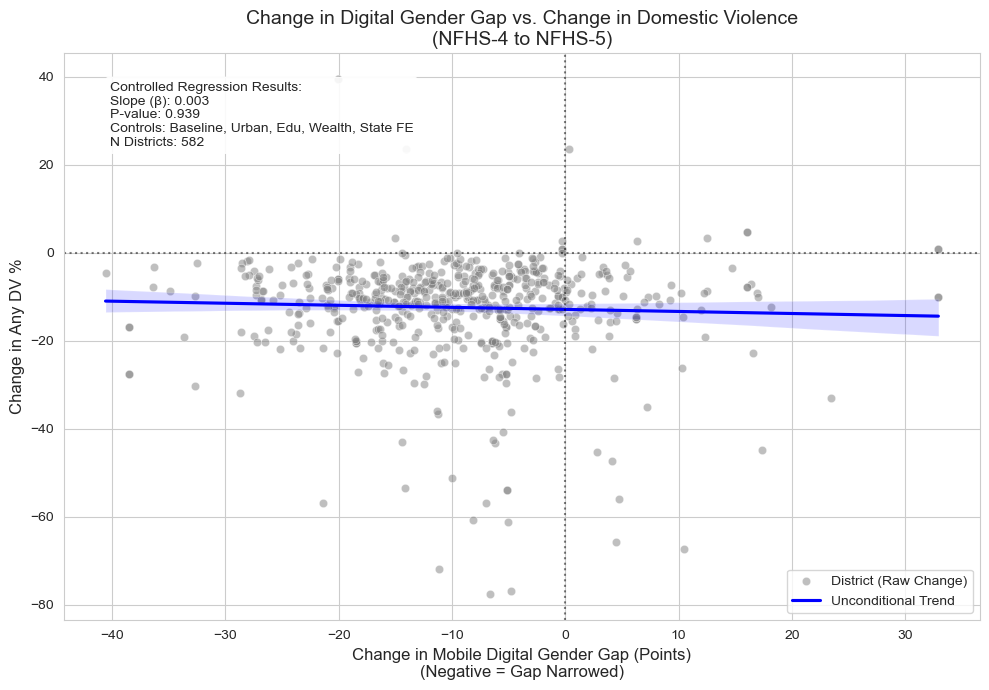

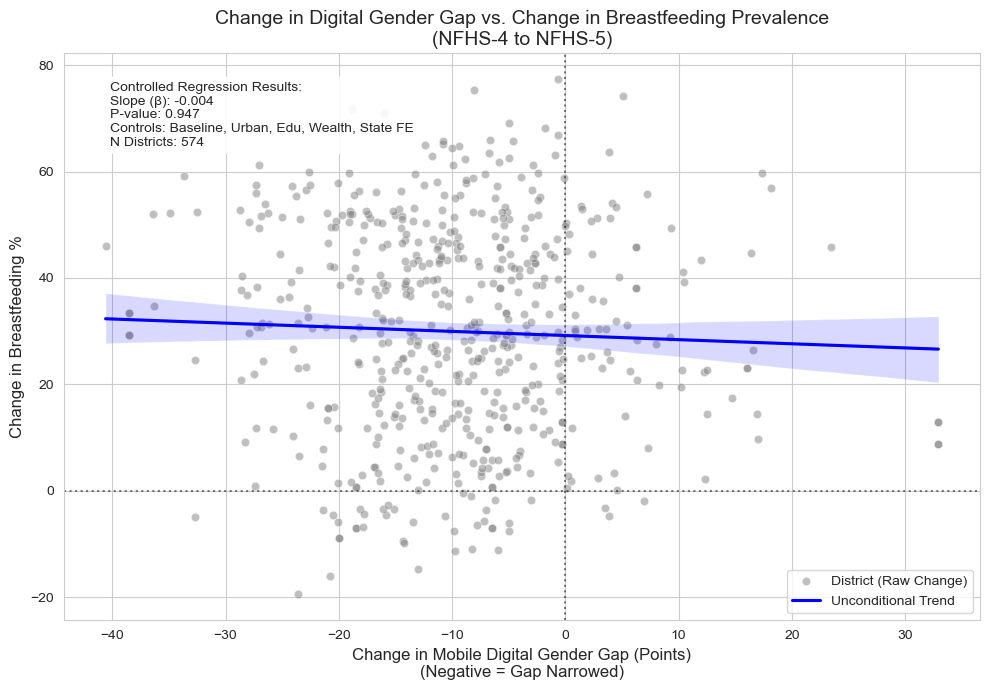

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

# --- 1. DATA PREPARATION ---

# Calculate Delta Digital Gender Gap (X-Axis)
# Note: DGG = Male% - Female%. 
# Delta DGG = DGG_5 - DGG_4. 
# Negative Delta means the gap narrowed (women caught up).
df['dgg_4'] = df['male_pct_has_mobile_4'] - df['female_pct_has_mobile_4']
df['dgg_5'] = df['m_pct_owns_mobile_5'] - df['f_pct_has_mobile_5']
df['delta_dgg'] = df['dgg_5'] - df['dgg_4']

# Calculate Delta Controls (for the regression)
# Urban Share Change
df['delta_urban'] = df['f_pct_urban_5'] - df['female_urban_share_4']
# Education Change (Years of schooling)
df['delta_edu'] = df['f_mean_yrs_edu_5'] - df['female_mean_education_4']
# Wealth Change
df['delta_wealth'] = df['f_mean_wealth_idx_5'] - df['female_mean_wealth_index_4']

# --- 2. DEFINE OUTCOMES ---

# Outcome 1: Domestic Violence (Any DV)
# Using Male-reported DV as it is available in both provided variable lists
df['delta_dv'] = df['m_pct_any_dv_5'] - df['m_pct_any_dv_4']
df['baseline_dv'] = df['m_pct_any_dv_4']

# Outcome 2: Breastfeeding Prevalence
# Note: Using 'female_pct_breastfeeding_4_x' vs 'f_pct_early_bf_5' 
# (Please verify if these definitions align in your full codebook. If not, swap with correct var)
df['delta_bf_prev'] = df['f_pct_early_bf_5'] - df['female_pct_breastfeeding_4_x']
df['baseline_bf_prev'] = df['female_pct_breastfeeding_4_x']

# Outcome 3: Breastfeeding Duration
# Note: Round 5 has 'f_mean_bf_months_5'. Round 4 list provided didn't explicitly show a duration mean.
# I will create a placeholder. If you don't have the R4 variable, this section will need that column name.
# df['delta_bf_dur'] = df['f_mean_bf_months_5'] - df['female_mean_bf_duration_4'] 
# Skipping Duration calculation in the main block to avoid errors if column is missing, 
# but the plotting function below can handle it if you uncomment/provide the column.

# --- 3. REGRESSION & PLOTTING FUNCTION ---

def plot_controlled_change(df, y_delta_col, y_baseline_col, y_label, title_outcome):
    """
    Plots raw scatter of change, but annotates with slope from controlled regression.
    """
    # Filter for non-nulls to ensure regression works
    reg_df = df.dropna(subset=[y_delta_col, 'delta_dgg', y_baseline_col, 'delta_urban', 'delta_edu', 'delta_wealth', 'State'])
    
    # A. Run Controlled OLS Regression
    # Model: ΔOutcome ~ ΔDGG + Baseline_Outcome + ΔControls + State_Fixed_Effects
    formula = f"{y_delta_col} ~ delta_dgg + {y_baseline_col} + delta_urban + delta_edu + delta_wealth + C(State)"
    
    model = smf.ols(formula, data=reg_df).fit()
    
    # Extract coefficients for annotation
    beta_dgg = model.params['delta_dgg']
    p_value = model.pvalues['delta_dgg']
    n_obs = int(model.nobs)
    
    # Format annotation text
    significance = ""
    if p_value < 0.01: significance = "***"
    elif p_value < 0.05: significance = "**"
    elif p_value < 0.1: significance = "*"
    
    annot_text = (f"Controlled Regression Results:\n"
                  f"Slope (β): {beta_dgg:.3f}{significance}\n"
                  f"P-value: {p_value:.3f}\n"
                  f"Controls: Baseline, Urban, Edu, Wealth, State FE\n"
                  f"N Districts: {n_obs}")

    # B. Plotting
    plt.figure(figsize=(10, 7))
    
    # 1. Raw Scatter Plot (The "Cloud")
    sns.scatterplot(data=reg_df, x='delta_dgg', y=y_delta_col, alpha=0.5, color='grey', label='District (Raw Change)')
    
    # 2. Fitted Line (Simple visual trend of the raw data)
    sns.regplot(data=reg_df, x='delta_dgg', y=y_delta_col, scatter=False, color='blue', label='Unconditional Trend')
    
    # 3. Add Annotation Box
    # Place text in a corner (usually upper right or lower right depending on data)
    plt.gca().text(0.05, 0.95, annot_text, transform=plt.gca().transAxes, 
                   fontsize=10, verticalalignment='top', 
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    # Labels and Title
    plt.title(f"Change in Digital Gender Gap vs. Change in {title_outcome}\n(NFHS-4 to NFHS-5)", fontsize=14)
    plt.xlabel('Change in Mobile Digital Gender Gap (Points)\n(Negative = Gap Narrowed)', fontsize=12)
    plt.ylabel(f'Change in {y_label}', fontsize=12)
    
    # Add zero lines for reference
    plt.axvline(0, color='black', linestyle=':', alpha=0.5)
    plt.axhline(0, color='black', linestyle=':', alpha=0.5)
    
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# --- 4. GENERATE PLOTS ---

# Plot 1: Domestic Violence
plot_controlled_change(df, 'delta_dv', 'baseline_dv', 'Any DV %', 'Domestic Violence')

# Plot 2: Breastfeeding Prevalence
# (Ensure columns match your specific definitions of prevalence)
plot_controlled_change(df, 'delta_bf_prev', 'baseline_bf_prev', 'Breastfeeding %', 'Breastfeeding Prevalence')

# Plot 3: Breastfeeding Duration 
# UNCOMMENT below if you have the Round 4 Duration variable
# plot_controlled_change(df, 'delta_bf_dur', 'baseline_bf_dur', 'Months of BF', 'Breastfeeding Duration')

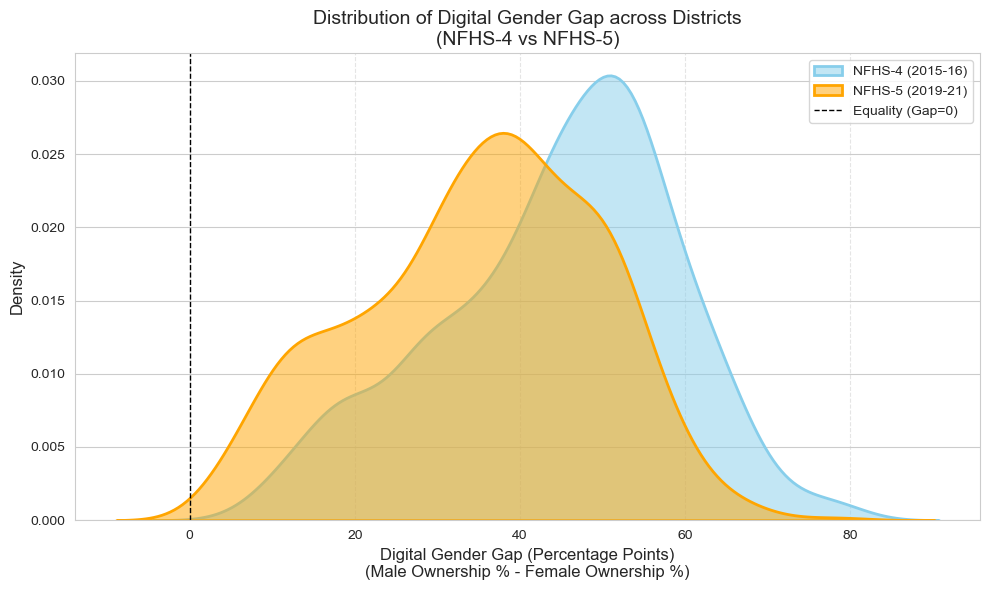

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Preparation ---
# Calculate Digital Gender Gap (Male % - Female %) for both rounds
# A positive value means men own more phones than women.
df['dgg_4'] = df['male_pct_has_mobile_4'] - df['female_pct_has_mobile_4']
df['dgg_5'] = df['m_pct_owns_mobile_5'] - df['f_pct_has_mobile_5']

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot NFHS-4 Density
sns.kdeplot(
    data=df, x='dgg_4', 
    fill=True, label='NFHS-4 (2015-16)', 
    color='skyblue', alpha=0.5, linewidth=2
)

# Plot NFHS-5 Density
sns.kdeplot(
    data=df, x='dgg_5', 
    fill=True, label='NFHS-5 (2019-21)', 
    color='orange', alpha=0.5, linewidth=2
)

# Formatting
plt.title('Distribution of Digital Gender Gap across Districts\n(NFHS-4 vs NFHS-5)', fontsize=14)
plt.xlabel('Digital Gender Gap (Percentage Points)\n(Male Ownership % - Female Ownership %)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add reference line at 0 (Perfect Equality)
plt.axvline(0, color='black', linestyle='--', linewidth=1, label='Equality (Gap=0)')

plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

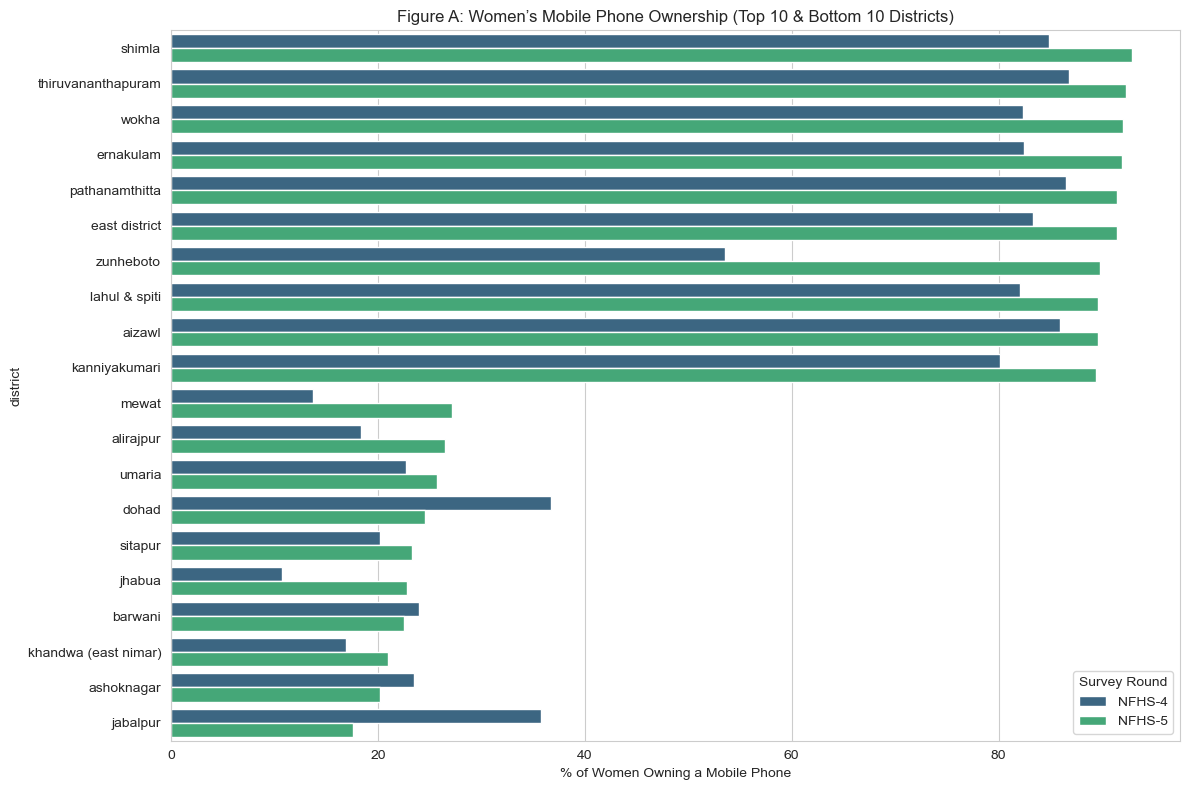

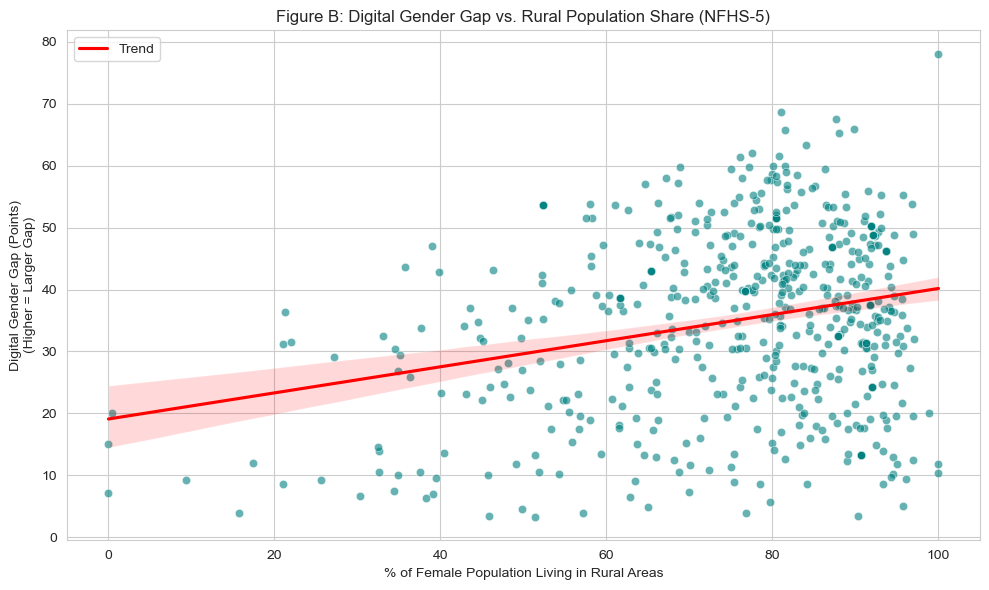

C:\Users\Soumya Pandey\AppData\Local\Temp\ipykernel_31224\2341869676.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bottom_c, x='delta_digital_divide', y='district', palette=colors)


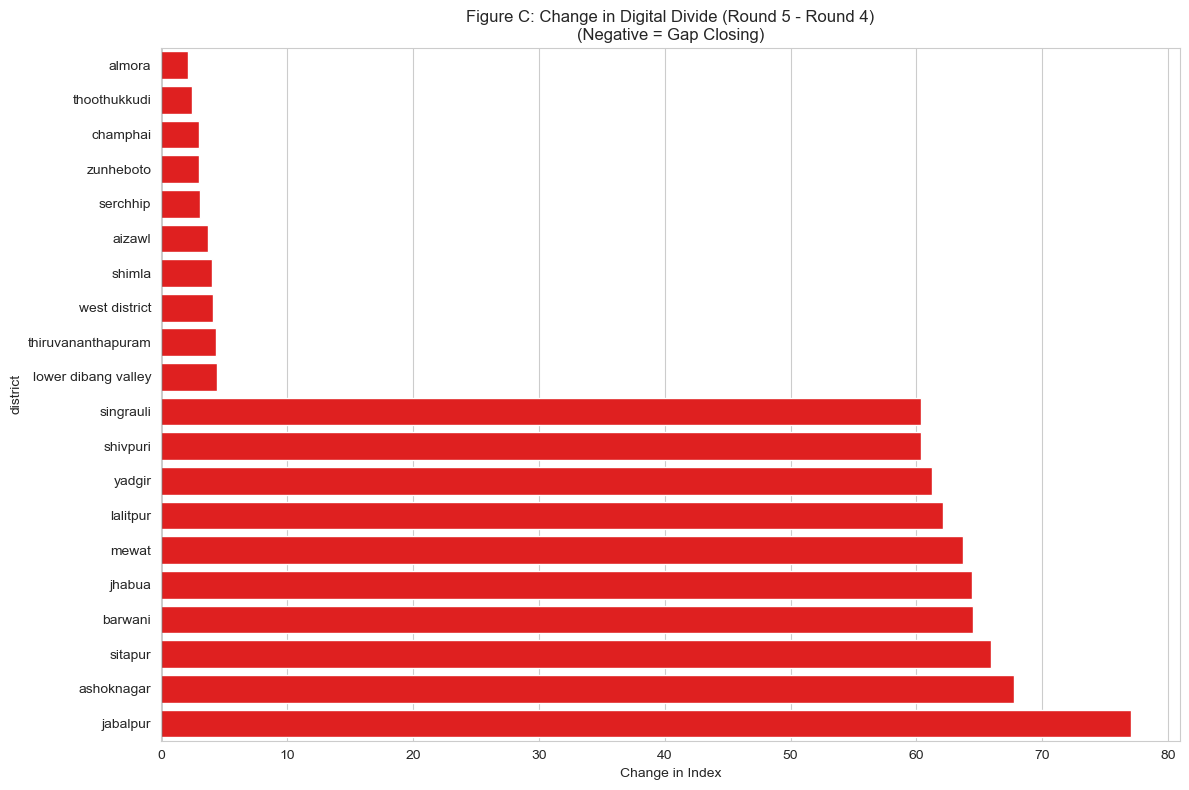


REGRESSION TABLE: Change in Domestic Violence
                            OLS Regression Results                            
Dep. Variable:               delta_dv   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     16.69
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           3.57e-59
Time:                        01:50:15   Log-Likelihood:                -2064.7
No. Observations:                 582   AIC:                             4191.
Df Residuals:                     551   BIC:                             4327.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

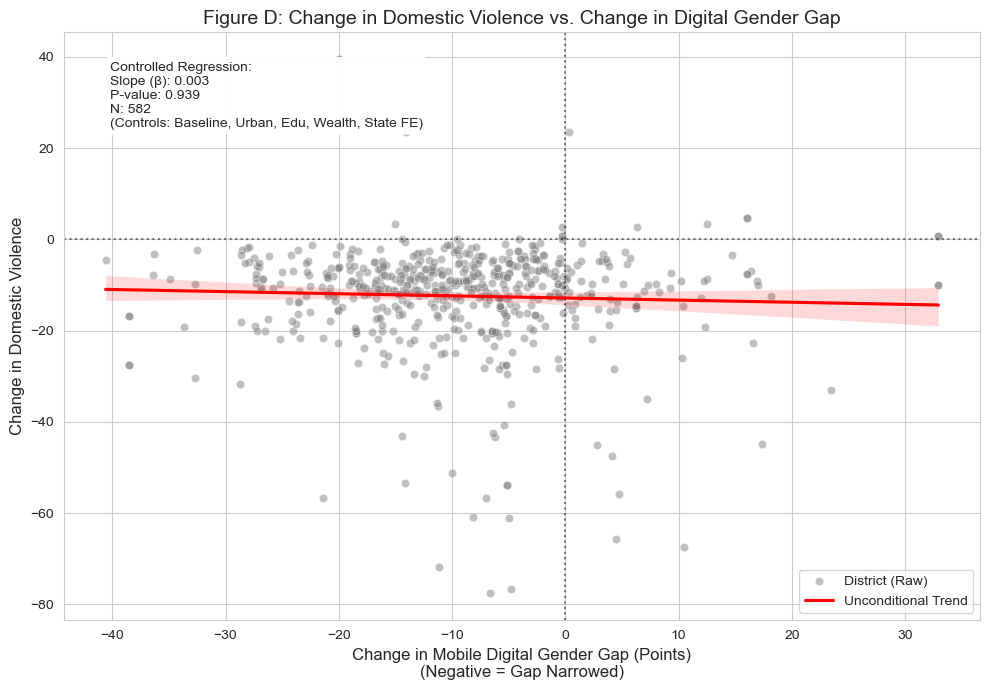


REGRESSION TABLE: Change in Breastfeeding Prevalence
                            OLS Regression Results                            
Dep. Variable:          delta_bf_prev   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     44.81
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          2.21e-126
Time:                        01:50:16   Log-Likelihood:                -2170.9
No. Observations:                 574   AIC:                             4404.
Df Residuals:                     543   BIC:                             4539.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------

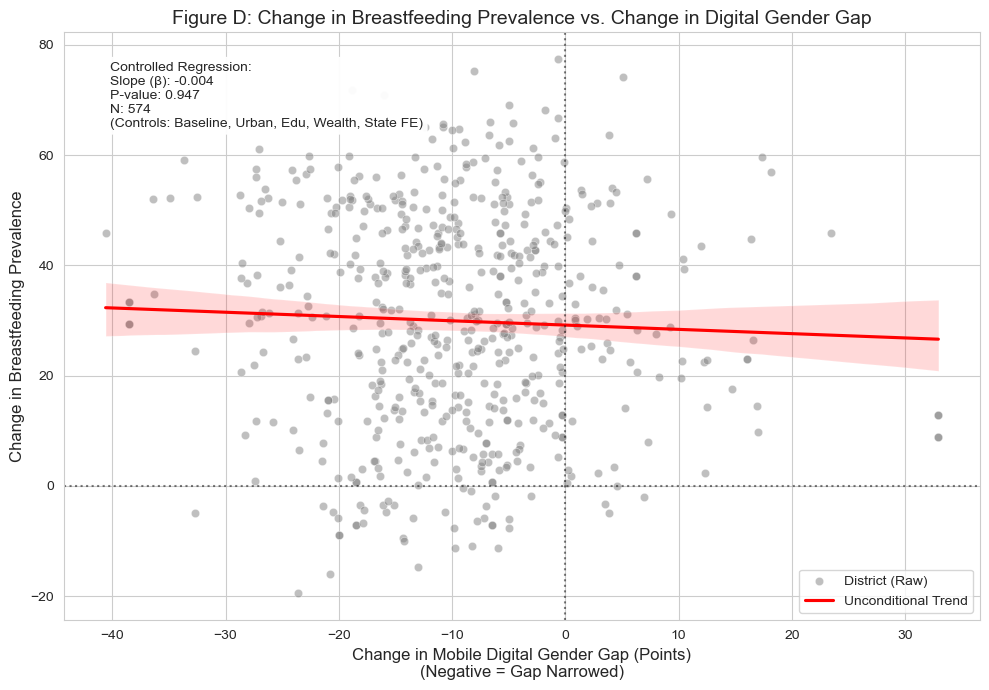

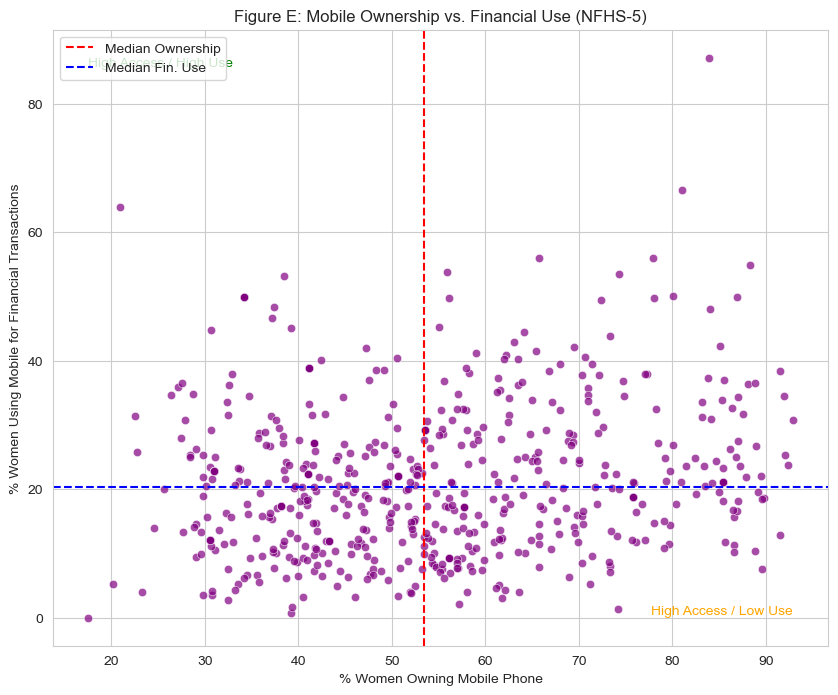

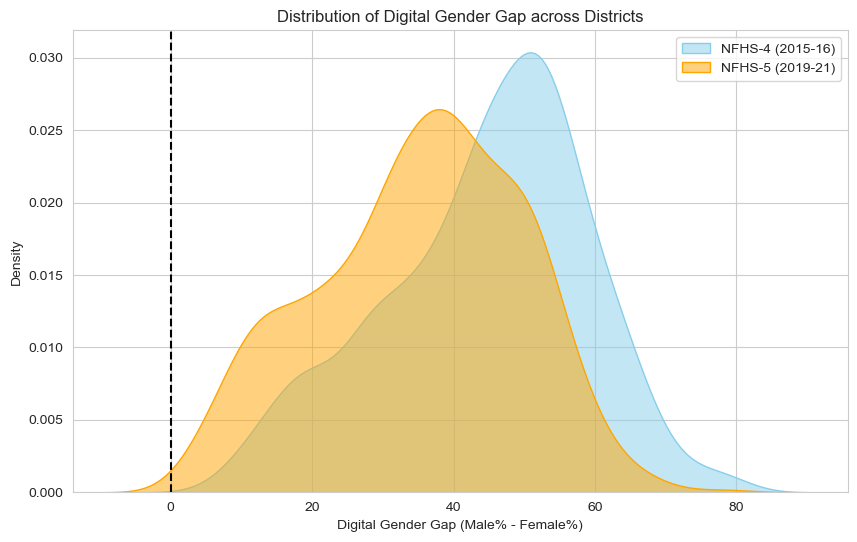

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Set plot style
sns.set_style("whitegrid")

# ==============================================================================
# 1. DATA PREPARATION & FEATURE ENGINEERING
# ==============================================================================

# --- A. Digital Gender Gap (DGG) ---
# Formula: Male Ownership % - Female Ownership %
# A positive value means a gap favoring men.
df['dgg_4'] = df['male_pct_has_mobile_4'] - df['female_pct_has_mobile_4']
df['dgg_5'] = df['m_pct_owns_mobile_5'] - df['f_pct_has_mobile_5']

# Change in DGG (Round 5 - Round 4)
# Negative value = Gap has narrowed (Good).
df['delta_dgg'] = df['dgg_5'] - df['dgg_4']

# --- B. Control Variables (Change over time) ---
# Urban Share
df['delta_urban'] = df['f_pct_urban_5'] - df['female_urban_share_4']
# Education (Years)
df['delta_edu'] = df['f_mean_yrs_edu_5'] - df['female_mean_education_4']
# Wealth Index
df['delta_wealth'] = df['f_mean_wealth_idx_5'] - df['female_mean_wealth_index_4']

# --- C. Outcome Variables (Change over time) ---
# 1. Domestic Violence (Any DV reported by husband/men)
df['delta_dv'] = df['m_pct_any_dv_5'] - df['m_pct_any_dv_4']

# 2. Breastfeeding Prevalence
# (Assuming 'f_pct_early_bf_5' and 'female_pct_breastfeeding_4_x' are comparable prevalence metrics)
df['delta_bf_prev'] = df['f_pct_early_bf_5'] - df['female_pct_breastfeeding_4_x']

# 3. Internet/Digital Divide (Score Based)
df['delta_digital_divide'] = df['digital_gender_gap_5'] - df['digital_gender_gap_score_4']

# ==============================================================================
# 2. FIGURE A: Women's Mobile Ownership (Top/Bottom Change)
# ==============================================================================
# Sort by NFHS-5 value to pick top 10 and bottom 10 for readability
df_sorted = df.sort_values('f_pct_has_mobile_5', ascending=False)
top_bottom_districts = pd.concat([df_sorted.head(10), df_sorted.tail(10)])

plot_df = top_bottom_districts.melt(
    id_vars='district', 
    value_vars=['female_pct_has_mobile_4', 'f_pct_has_mobile_5'],
    var_name='Survey', value_name='Percentage'
)
plot_df['Survey'] = plot_df['Survey'].map({'female_pct_has_mobile_4': 'NFHS-4', 'f_pct_has_mobile_5': 'NFHS-5'})

plt.figure(figsize=(12, 8))
sns.barplot(data=plot_df, x='Percentage', y='district', hue='Survey', palette='viridis')
plt.title('Figure A: Women’s Mobile Phone Ownership (Top 10 & Bottom 10 Districts)')
plt.xlabel('% of Women Owning a Mobile Phone')
plt.legend(title='Survey Round')
plt.tight_layout()
plt.show()

# ==============================================================================
# 3. FIGURE B: Digital Gender Gap vs Rural Population
# ==============================================================================
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='f_pct_rural_5', y='dgg_5', alpha=0.6, color='teal')
sns.regplot(data=df, x='f_pct_rural_5', y='dgg_5', scatter=False, color='red', label='Trend')
plt.title('Figure B: Digital Gender Gap vs. Rural Population Share (NFHS-5)')
plt.xlabel('% of Female Population Living in Rural Areas')
plt.ylabel('Digital Gender Gap (Points)\n(Higher = Larger Gap)')
plt.legend()
plt.tight_layout()
plt.show()

# ==============================================================================
# 4. FIGURE C: Change in Digital Divide
# ==============================================================================
df_sorted_c = df.sort_values('delta_digital_divide')
top_bottom_c = pd.concat([df_sorted_c.head(10), df_sorted_c.tail(10)])
colors = ['green' if x < 0 else 'red' for x in top_bottom_c['delta_digital_divide']]

plt.figure(figsize=(12, 8))
sns.barplot(data=top_bottom_c, x='delta_digital_divide', y='district', palette=colors)
plt.title('Figure C: Change in Digital Divide (Round 5 - Round 4)\n(Negative = Gap Closing)')
plt.xlabel('Change in Index')
plt.axvline(0, color='k', linewidth=1)
plt.tight_layout()
plt.show()

# ==============================================================================
# 5. FIGURE D: REGRESSION PLOTS (With Tables)
# ==============================================================================

def run_regression_plot(data, y_col, y_baseline_col, title_metric):
    """
    Runs controlled regression, prints table, and plots scatter with annotation.
    """
    print(f"\n{'='*60}")
    print(f"REGRESSION TABLE: Change in {title_metric}")
    print(f"{'='*60}")
    
    # Clean data for regression
    cols_needed = [y_col, 'delta_dgg', y_baseline_col, 'delta_urban', 'delta_edu', 'delta_wealth', 'State']
    reg_df = data.dropna(subset=cols_needed)
    
    # 1. Run Regression
    # Formula: ΔOutcome ~ ΔDGG + Baseline + ΔControls + State FE
    formula = f"{y_col} ~ delta_dgg + {y_baseline_col} + delta_urban + delta_edu + delta_wealth + C(State)"
    model = smf.ols(formula, data=reg_df).fit()
    
    # Print Table to Console
    print(model.summary())
    
    # 2. Create Plot
    beta = model.params['delta_dgg']
    p_val = model.pvalues['delta_dgg']
    n_obs = model.nobs
    
    plt.figure(figsize=(10, 7))
    
    # Raw scatter
    sns.scatterplot(data=reg_df, x='delta_dgg', y=y_col, alpha=0.5, color='grey', label='District (Raw)')
    
    # Trend line
    sns.regplot(data=reg_df, x='delta_dgg', y=y_col, scatter=False, color='red', label='Unconditional Trend')
    
    # Annotation Box
    sig = "***" if p_val < 0.01 else "**" if p_val < 0.05 else "*" if p_val < 0.1 else ""
    annot_text = (f"Controlled Regression:\n"
                  f"Slope (β): {beta:.3f}{sig}\n"
                  f"P-value: {p_val:.3f}\n"
                  f"N: {int(n_obs)}\n"
                  f"(Controls: Baseline, Urban, Edu, Wealth, State FE)")
    
    plt.gca().text(0.05, 0.95, annot_text, transform=plt.gca().transAxes, 
                   fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.95))
    
    plt.title(f"Figure D: Change in {title_metric} vs. Change in Digital Gender Gap", fontsize=14)
    plt.xlabel('Change in Mobile Digital Gender Gap (Points)\n(Negative = Gap Narrowed)', fontsize=12)
    plt.ylabel(f'Change in {title_metric}', fontsize=12)
    plt.axvline(0, color='k', linestyle=':', alpha=0.5)
    plt.axhline(0, color='k', linestyle=':', alpha=0.5)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# Run for Outcomes
run_regression_plot(df, 'delta_dv', 'm_pct_any_dv_4', "Domestic Violence")
run_regression_plot(df, 'delta_bf_prev', 'female_pct_breastfeeding_4_x', "Breastfeeding Prevalence")

# ==============================================================================
# 6. FIGURE E: Meaningful Use (Quadrants)
# ==============================================================================
median_own = df['f_pct_has_mobile_5'].median()
median_use = df['f_pct_mobile_fin_5'].median()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='f_pct_has_mobile_5', y='f_pct_mobile_fin_5', alpha=0.7, color='purple')
plt.axvline(median_own, color='r', linestyle='--', label='Median Ownership')
plt.axhline(median_use, color='b', linestyle='--', label='Median Fin. Use')
plt.text(df['f_pct_has_mobile_5'].min(), df['f_pct_mobile_fin_5'].max(), 'High Access / High Use', color='green', ha='left', va='top')
plt.text(df['f_pct_has_mobile_5'].max(), df['f_pct_mobile_fin_5'].min(), 'High Access / Low Use', color='orange', ha='right', va='bottom')
plt.title('Figure E: Mobile Ownership vs. Financial Use (NFHS-5)')
plt.xlabel('% Women Owning Mobile Phone')
plt.ylabel('% Women Using Mobile for Financial Transactions')
plt.legend()
plt.show()

# ==============================================================================
# 7. K-Density Plot (Distribution Change)
# ==============================================================================
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='dgg_4', fill=True, label='NFHS-4 (2015-16)', color='skyblue', alpha=0.5)
sns.kdeplot(data=df, x='dgg_5', fill=True, label='NFHS-5 (2019-21)', color='orange', alpha=0.5)
plt.title('Distribution of Digital Gender Gap across Districts')
plt.xlabel('Digital Gender Gap (Male% - Female%)')
plt.axvline(0, color='k', linestyle='--')
plt.legend()
plt.show()


REGRESSION RESULTS: Change in Domestic Violence
                            OLS Regression Results                            
Dep. Variable:               delta_dv   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     15.43
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.08e-57
Time:                        01:50:17   Log-Likelihood:                -2066.1
No. Observations:                 582   AIC:                             4198.
Df Residuals:                     549   BIC:                             4342.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

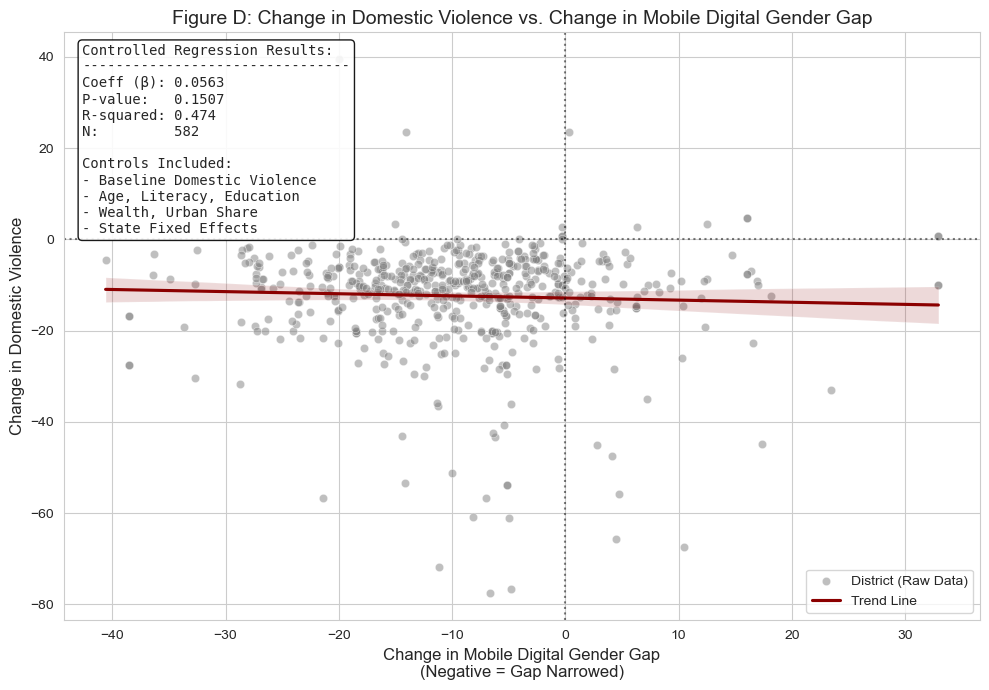


REGRESSION RESULTS: Change in Breastfeeding Prevalence
                            OLS Regression Results                            
Dep. Variable:          delta_bf_prev   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     44.12
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          4.49e-129
Time:                        01:50:17   Log-Likelihood:                -2160.1
No. Observations:                 574   AIC:                             4386.
Df Residuals:                     541   BIC:                             4530.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

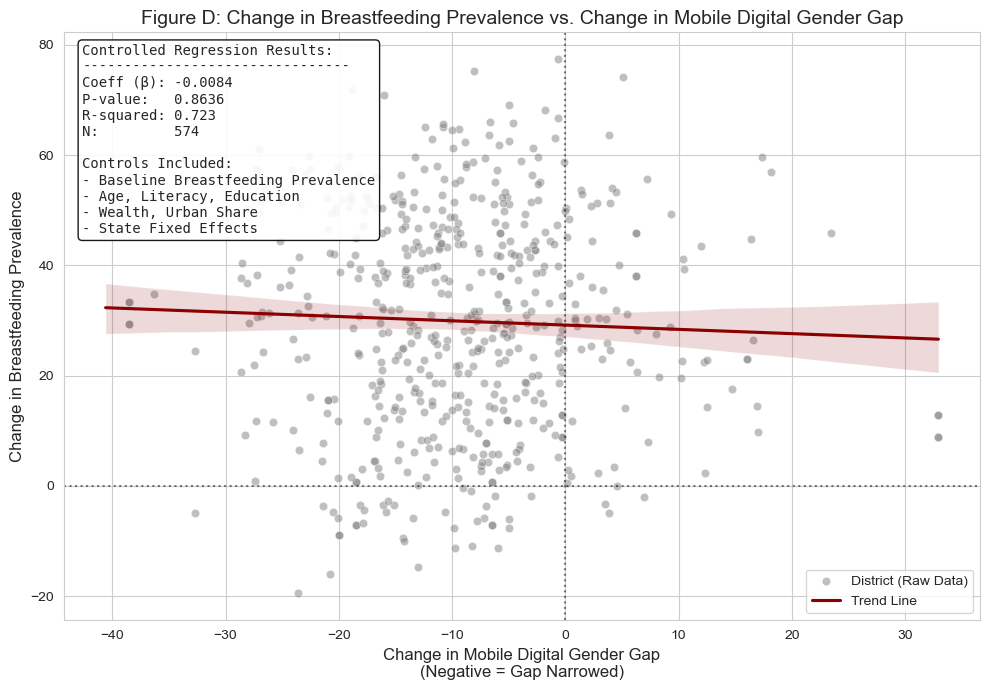

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Set plot style
sns.set_style("whitegrid")

# ==============================================================================
# 1. DATA PREPARATION
# ==============================================================================

# --- A. Digital Gender Gap (The Main Predictor) ---
# DGG = Male% - Female%
# Delta DGG = Round 5 Gap - Round 4 Gap
# Negative value = Gap Narrowed (Improvement)
df['dgg_4'] = df['male_pct_has_mobile_4'] - df['female_pct_has_mobile_4']
df['dgg_5'] = df['m_pct_owns_mobile_5'] - df['f_pct_has_mobile_5']
df['delta_dgg'] = df['dgg_5'] - df['dgg_4']

# --- B. Outcome Variables (Change over Time) ---
# Domestic Violence (Any DV reported by men/household)
df['delta_dv'] = df['m_pct_any_dv_5'] - df['m_pct_any_dv_4']

# Breastfeeding Prevalence
# (Assuming 'f_pct_early_bf_5' and 'female_pct_breastfeeding_4_x' are the correct pair)
df['delta_bf_prev'] = df['f_pct_early_bf_5'] - df['female_pct_breastfeeding_4_x']


# ==============================================================================
# 2. REGRESSION & PLOTTING FUNCTION
# ==============================================================================

def plot_regression_with_baseline_controls(data, y_col, y_baseline_col, x_col, title_outcome, title_x):
    """
    Regresses Change in Outcome on Change in X, controlling for BASELINE characteristics.
    """
    
    # Define Controls (Baseline Round 4 values)
    # These control for the starting conditions of the district
    controls = [
        'female_mean_age_4', 
        'female_literacy_rate_4', 
        'female_mean_education_4', 
        'female_mean_wealth_index_4', 
        'female_urban_share_4'
    ]
    
    # Drop missing values
    cols_to_check = [y_col, x_col, y_baseline_col, 'State'] + controls
    reg_df = data.dropna(subset=cols_to_check)
    
    # Formula construction
    # Model: ΔOutcome ~ ΔDGG + Baseline_Outcome + Baseline_Age + Baseline_Lit + ... + StateFE
    control_formula = " + ".join(controls)
    formula = f"{y_col} ~ {x_col} + {y_baseline_col} + {control_formula} + C(State)"
    
    # Run OLS Regression
    model = smf.ols(formula, data=reg_df).fit()
    
    # Print Full Table to Console
    print(f"\n{'='*80}")
    print(f"REGRESSION RESULTS: Change in {title_outcome}")
    print(f"{'='*80}")
    print(model.summary())
    
    # --- PLOTTING ---
    plt.figure(figsize=(10, 7))
    
    # 1. Scatter of Raw Data (The Cloud)
    sns.scatterplot(data=reg_df, x=x_col, y=y_col, alpha=0.5, color='gray', label='District (Raw Data)')
    
    # 2. Trend Line (Visual Aid)
    # Note: This is the simple regression line for visualization.
    sns.regplot(data=reg_df, x=x_col, y=y_col, scatter=False, color='darkred', label='Trend Line')
    
    # 3. Annotation Box (Controlled Results)
    # We extract the 'beta' for delta_dgg from the controlled model to display on the plot
    beta = model.params[x_col]
    p_val = model.pvalues[x_col]
    n_obs = model.nobs
    r_sq = model.rsquared
    
    # Add stars for significance
    sig_stars = "***" if p_val < 0.01 else "**" if p_val < 0.05 else "*" if p_val < 0.1 else ""
    
    stats_text = (
        f"Controlled Regression Results:\n"
        f"--------------------------------\n"
        f"Coeff (β): {beta:.4f}{sig_stars}\n"
        f"P-value:   {p_val:.4f}\n"
        f"R-squared: {r_sq:.3f}\n"
        f"N:         {int(n_obs)}\n\n"
        f"Controls Included:\n"
        f"- Baseline {title_outcome}\n"
        f"- Age, Literacy, Education\n"
        f"- Wealth, Urban Share\n"
        f"- State Fixed Effects"
    )
    
    # Place text box in top-left
    plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes,
                   fontsize=10, verticalalignment='top', fontfamily='monospace',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='black'))
    
    plt.title(f"Figure D: Change in {title_outcome} vs. {title_x}", fontsize=14)
    plt.xlabel(f"{title_x}\n(Negative = Gap Narrowed)", fontsize=12)
    plt.ylabel(f"Change in {title_outcome}", fontsize=12)
    
    # Add zero reference lines
    plt.axhline(0, color='black', linestyle=':', alpha=0.5)
    plt.axvline(0, color='black', linestyle=':', alpha=0.5)
    
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# ==============================================================================
# 3. EXECUTE ANALYSIS
# ==============================================================================

# A. Regression for Domestic Violence
plot_regression_with_baseline_controls(
    df, 
    y_col='delta_dv', 
    y_baseline_col='m_pct_any_dv_4', 
    x_col='delta_dgg', 
    title_outcome='Domestic Violence',
    title_x='Change in Mobile Digital Gender Gap'
)

# B. Regression for Breastfeeding Prevalence
plot_regression_with_baseline_controls(
    df, 
    y_col='delta_bf_prev', 
    y_baseline_col='female_pct_breastfeeding_4_x', 
    x_col='delta_dgg', 
    title_outcome='Breastfeeding Prevalence',
    title_x='Change in Mobile Digital Gender Gap'
)


################################################################################
REGRESSION: Change in Domestic Violence (Change)
################################################################################
                            OLS Regression Results                            
Dep. Variable:               delta_dv   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     15.43
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           2.08e-57
Time:                        01:50:18   Log-Likelihood:                -2066.1
No. Observations:                 582   AIC:                             4198.
Df Residuals:                     549   BIC:                             4342.
Df Model:                          32                                         
Covariance Type:            nonrobust                                        

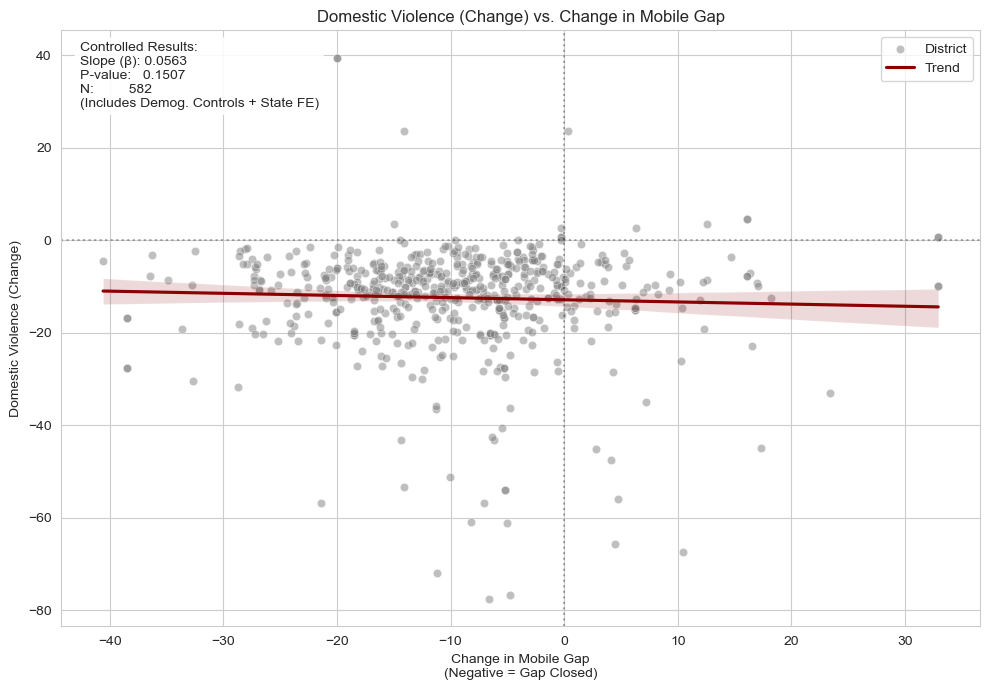


################################################################################
REGRESSION: Change in Breastfeeding Prevalence (Change)
################################################################################
                            OLS Regression Results                            
Dep. Variable:          delta_bf_prev   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     44.12
Date:                Thu, 11 Dec 2025   Prob (F-statistic):          4.49e-129
Time:                        01:50:18   Log-Likelihood:                -2160.1
No. Observations:                 574   AIC:                             4386.
Df Residuals:                     541   BIC:                             4530.
Df Model:                          32                                         
Covariance Type:            nonrobust                                 

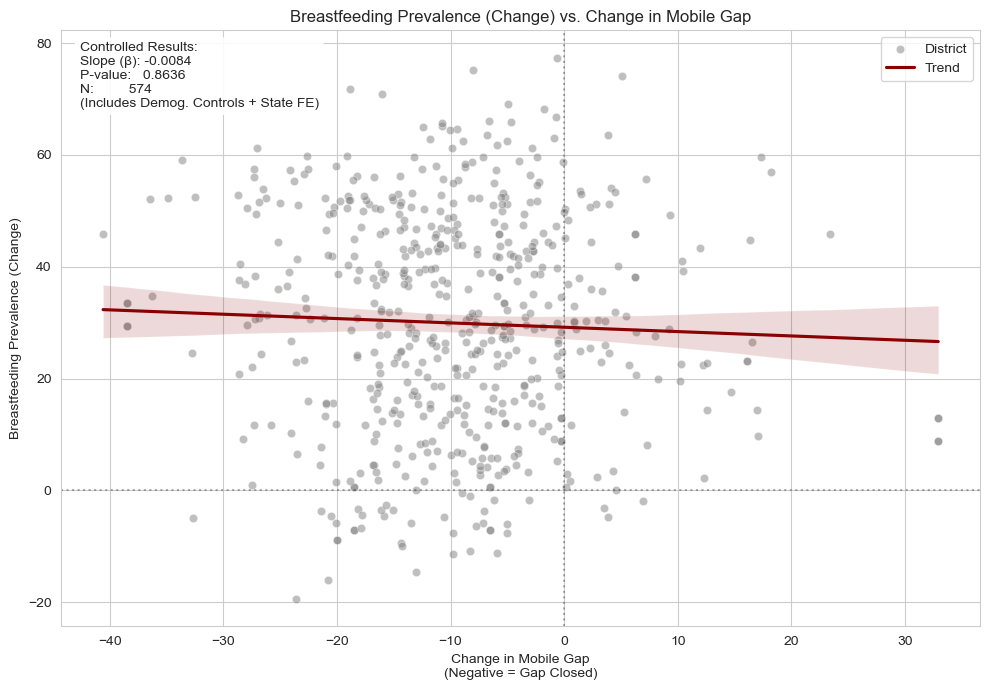


################################################################################
REGRESSION: Labor Force Participation (LFPR) (Round 5 Cross-Section)
################################################################################
                            OLS Regression Results                            
Dep. Variable:           lfpr_percent   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     24.12
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.09e-82
Time:                        01:50:18   Log-Likelihood:                -2085.6
No. Observations:                 582   AIC:                             4235.
Df Residuals:                     550   BIC:                             4375.
Df Model:                          31                                         
Covariance Type:            nonrobust                    

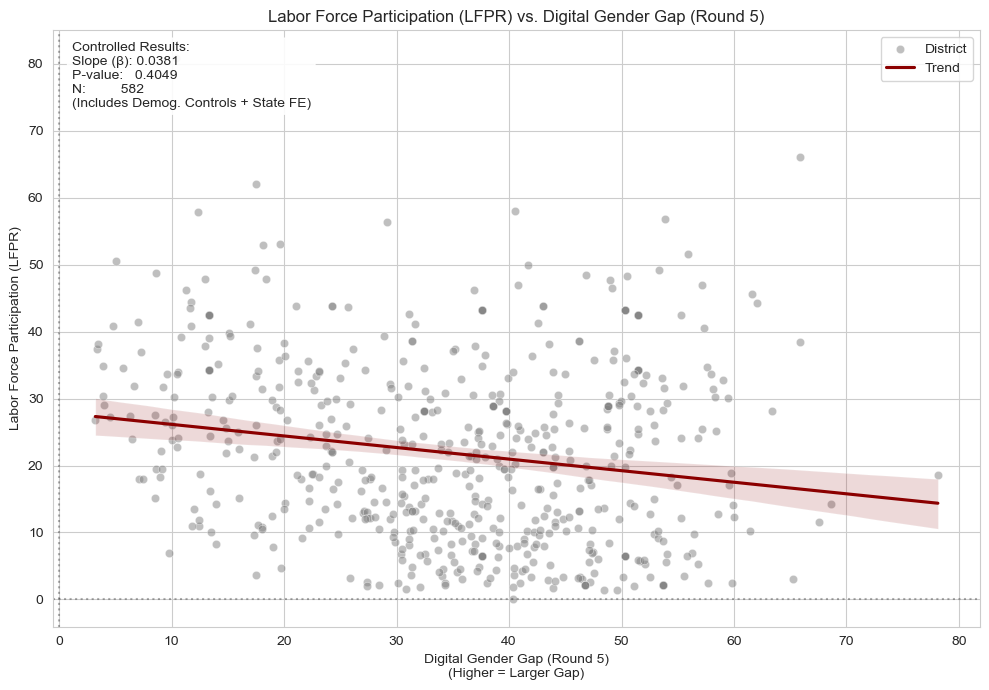

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# Set plot style
sns.set_style("whitegrid")

# ==============================================================================
# 1. DATA PREPARATION
# ==============================================================================

# --- A. Digital Gender Gap Variables ---
# Round 4 Gap
df['dgg_4'] = df['male_pct_has_mobile_4'] - df['female_pct_has_mobile_4']
# Round 5 Gap
df['dgg_5'] = df['m_pct_owns_mobile_5'] - df['f_pct_has_mobile_5']
# Change in Gap (Negative = Gap Narrowed)
df['delta_dgg'] = df['dgg_5'] - df['dgg_4']

# --- B. Outcome Variables (Change over Time) ---
# 1. Domestic Violence (Change)
df['delta_dv'] = df['m_pct_any_dv_5'] - df['m_pct_any_dv_4']

# 2. Breastfeeding Prevalence (Change)
# Note: Ensure these are the correct prevalence variables from your specific list
df['delta_bf_prev'] = df['f_pct_early_bf_5'] - df['female_pct_breastfeeding_4_x']

# 3. LFPR (Level - Round 5 Only)
# Using 'lfpr_percent' as the outcome variable
# We will regress this against 'dgg_5' directly.


# ==============================================================================
# 2. REGRESSION FUNCTIONS
# ==============================================================================

def run_change_regression(data, y_col, y_baseline_col, x_col, title_outcome):
    """
    Model: ΔOutcome ~ ΔGap + Baseline_Controls + StateFE
    Used for: Domestic Violence, Breastfeeding
    """
    # Baseline (Round 4) Controls
    controls = [
        'female_mean_age_4', 
        'female_literacy_rate_4', 
        'female_mean_education_4', 
        'female_mean_wealth_index_4', 
        'female_urban_share_4'
    ]
    
    # Drop missing
    cols = [y_col, x_col, y_baseline_col, 'State'] + controls
    reg_df = data.dropna(subset=cols)
    
    # Formula
    control_str = " + ".join(controls)
    formula = f"{y_col} ~ {x_col} + {y_baseline_col} + {control_str} + C(State)"
    
    # Run OLS
    model = smf.ols(formula, data=reg_df).fit()
    
    # Print Table
    print(f"\n{'#'*80}")
    print(f"REGRESSION: Change in {title_outcome}")
    print(f"{'#'*80}")
    print(model.summary())
    
    # Plot
    plot_regression_scatter(reg_df, x_col, y_col, model, 
                            title_outcome, "Change in Mobile Gap\n(Negative = Gap Closed)")


def run_level_regression(data, y_col, x_col, title_outcome):
    """
    Model: Outcome_5 ~ Gap_5 + Controls_5 + StateFE
    Used for: LFPR (Round 5 only analysis)
    """
    # Round 5 Controls
    controls = [
        'f_mean_age_5', 
        'f_pct_literate_5', 
        'f_mean_yrs_edu_5', 
        'f_mean_wealth_idx_5', 
        'f_pct_urban_5'
    ]
    
    # Drop missing
    cols = [y_col, x_col, 'State'] + controls
    reg_df = data.dropna(subset=cols)
    
    # Formula
    control_str = " + ".join(controls)
    formula = f"{y_col} ~ {x_col} + {control_str} + C(State)"
    
    # Run OLS
    model = smf.ols(formula, data=reg_df).fit()
    
    # Print Table
    print(f"\n{'#'*80}")
    print(f"REGRESSION: {title_outcome} (Round 5 Cross-Section)")
    print(f"{'#'*80}")
    print(model.summary())
    
    # Plot
    plot_regression_scatter(reg_df, x_col, y_col, model, 
                            title_outcome, "Digital Gender Gap (Round 5)\n(Higher = Larger Gap)")


def plot_regression_scatter(df, x_col, y_col, model, title_y, title_x):
    """Helper function to plot the scatter + annotation"""
    plt.figure(figsize=(10, 7))
    
    # Scatter
    sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.5, color='gray', label='District')
    
    # Trend line
    sns.regplot(data=df, x=x_col, y=y_col, scatter=False, color='darkred', label='Trend')
    
    # Annotation
    beta = model.params[x_col]
    p_val = model.pvalues[x_col]
    n_obs = model.nobs
    sig = "***" if p_val < 0.01 else "**" if p_val < 0.05 else "*" if p_val < 0.1 else ""
    
    text = (f"Controlled Results:\n"
            f"Slope (β): {beta:.4f}{sig}\n"
            f"P-value:   {p_val:.4f}\n"
            f"N:         {int(n_obs)}\n"
            f"(Includes Demog. Controls + State FE)")
    
    plt.gca().text(0.02, 0.98, text, transform=plt.gca().transAxes,
                   fontsize=10, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
    
    plt.title(f"{title_y} vs. {title_x.splitlines()[0]}")
    plt.xlabel(title_x)
    plt.ylabel(title_y)
    plt.axhline(0, color='k', linestyle=':', alpha=0.3)
    plt.axvline(0, color='k', linestyle=':', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()


# ==============================================================================
# 3. EXECUTE ALL ANALYSES
# ==============================================================================

# 1. Domestic Violence (Change vs Change)
run_change_regression(
    df, 
    y_col='delta_dv', 
    y_baseline_col='m_pct_any_dv_4', 
    x_col='delta_dgg', 
    title_outcome='Domestic Violence (Change)'
)

# 2. Breastfeeding Prevalence (Change vs Change)
run_change_regression(
    df, 
    y_col='delta_bf_prev', 
    y_baseline_col='female_pct_breastfeeding_4_x', 
    x_col='delta_dgg', 
    title_outcome='Breastfeeding Prevalence (Change)'
)

# 3. LFPR (Round 5 Levels only)
run_level_regression(
    df,
    y_col='lfpr_percent',
    x_col='dgg_5',  # Round 5 Gap
    title_outcome='Labor Force Participation (LFPR)'
)

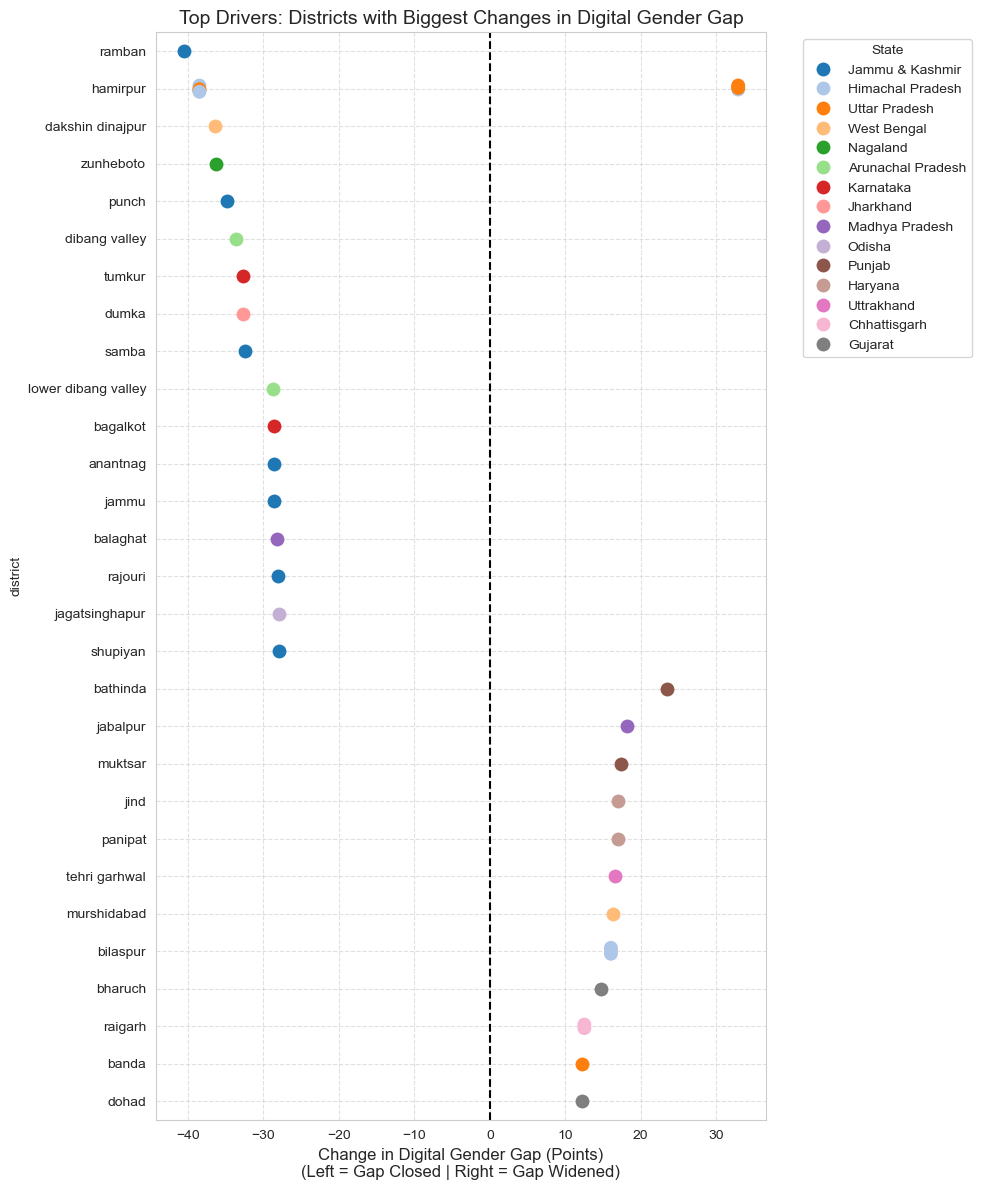

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Change in Gap (Negative = Improvement/Gap Closed)
df['delta_dgg'] = df['dgg_5'] - df['dgg_4']

# Filter for the top 20 "Most Improved" and top 20 "Least Improved"
# to keep the plot readable
top_improved = df.sort_values('delta_dgg').head(20)
least_improved = df.sort_values('delta_dgg', ascending=False).head(20)
plot_data = pd.concat([top_improved, least_improved])

plt.figure(figsize=(10, 12))
sns.stripplot(
    data=plot_data, 
    x='delta_dgg', 
    y='district', 
    hue='State', 
    size=10, 
    palette='tab20'
)

# Add a vertical line at 0 (No Change)
plt.axvline(0, color='black', linestyle='--')
plt.title('Top Drivers: Districts with Biggest Changes in Digital Gender Gap', fontsize=14)
plt.xlabel('Change in Digital Gender Gap (Points)\n(Left = Gap Closed | Right = Gap Widened)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='State')
plt.tight_layout()
plt.show()

In [12]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
   - -------------------------------------- 0.8/22.9 MB 8.5 MB/s eta 0:00:03
   ----- ---------------------------------- 2.9/22.9 MB 10.5 MB/s eta 0:00:02
   ------------ --------------------------- 7.1/22.9 MB 13.6 MB/s eta 0:00:02
   --------------------- ------------------ 12.3/22.9 MB 17.2 MB/s eta 0:00:01
   ------------------------------- -------- 18.1/22.9 MB 19.7 MB/s eta 0:00:01
   -------------------------------- ------- 18.9/22.9 MB 19.9 MB/s eta 0:00:01
   ---------------------------------------  22.8/22.9 MB 17.0 MB/s eta 0:00:01
   ---------------------------------------- 22.9/22.9 MB 16.5 MB/s  0:00:01
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------  6.3/6.3 MB 29.7 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 21.5 MB/s  0:00:00
   ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


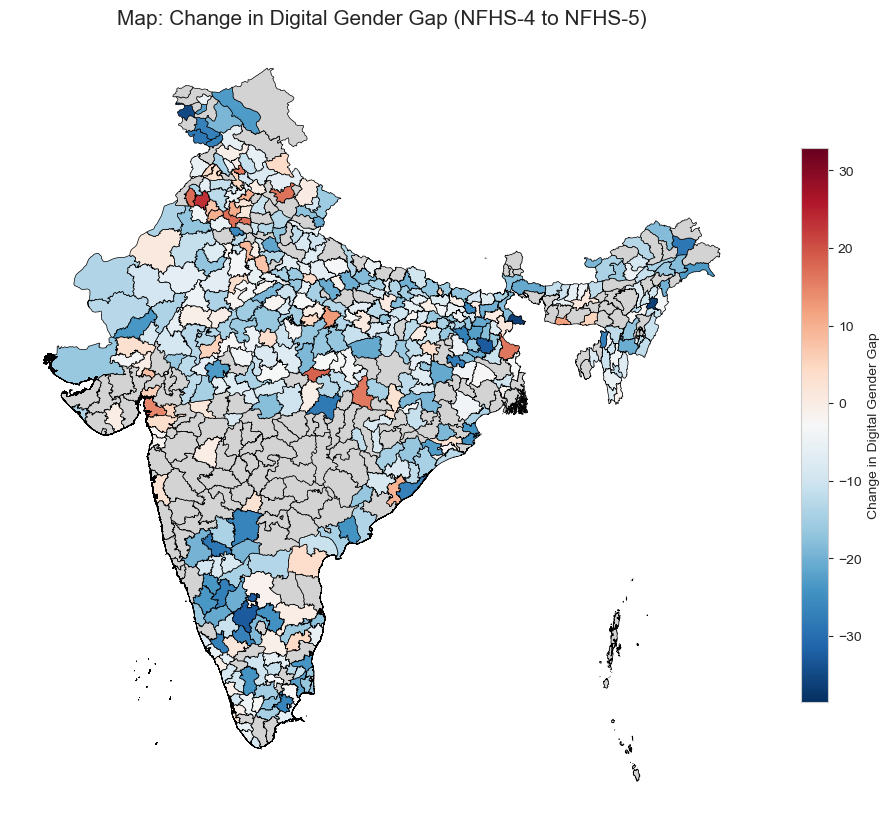

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load Map directly from GitHub (Standard India District GeoJSON)
url = "https://raw.githubusercontent.com/geohacker/india/master/district/india_district.geojson"

try:
    print("Downloading map data... this may take a moment.")
    map_gdf = gpd.read_file(url)
    
    # 2. Merge Data
    # Note: District names often have spelling differences (e.g., "Ahmedabad" vs "Ahmadabad").
    # We convert both to lowercase to improve matching.
    map_gdf['district_lower'] = map_gdf['NAME_2'].str.lower().str.strip() # 'NAME_2' is usually district name in this file
    df['district_lower'] = df['district'].str.lower().str.strip()
    
    merged_map = map_gdf.merge(df, left_on='district_lower', right_on='district_lower', how='left')

    # 3. Plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    merged_map.plot(
        column='delta_dgg',
        cmap='RdBu_r',  # Red=Widening, Blue=Closing
        linewidth=0.5,
        ax=ax,
        edgecolor='black',
        legend=True,
        legend_kwds={'label': "Change in Digital Gender Gap", 'shrink': 0.6},
        missing_kwds={'color': 'lightgrey'} # Color for districts with no match/data
    )
    ax.set_title('Map: Change in Digital Gender Gap (NFHS-4 to NFHS-5)', fontsize=15)
    ax.set_axis_off()
    plt.show()

except Exception as e:
    print(f"Could not download or map: {e}")
    print("Try the 'Dot Plot' option above instead!")

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ==============================================================================
# 1. IDENTIFY DRIVER DISTRICTS (Statistical "Drivers")
# ==============================================================================
# Before mapping, let's see which districts changed the most.
# These extreme values are likely "driving" your regression results.

# Calculate Change in Gap (if not already done)
# Negative = Gap Narrowed (Good)
df['delta_dgg'] = df['dgg_5'] - df['dgg_4']

print("--- DISTRICTS WHERE GAP NARROWED THE MOST (Success Stories) ---")
print(df.sort_values('delta_dgg').head(10)[['State', 'district', 'delta_dgg']])

print("\n--- DISTRICTS WHERE GAP WIDENED THE MOST (Problem Areas) ---")
print(df.sort_values('delta_dgg', ascending=False).head(10)[['State', 'district', 'delta_dgg']])


# ==============================================================================
# 2. GENERATE THE MAP
# ==============================================================================

# PATH TO YOUR SHAPEFILE
# You need a shapefile (e.g., from Datameet or standard India GIS repositories)
# that contains district boundaries.
shapefile_path = 'india_districts.geojson'  # <--- UPDATE THIS PATH

try:
    # 1. Load the Map Data
    map_gdf = gpd.read_file(shapefile_path)
    
    # 2. Merge your Data with the Map
    # CRITICAL: Ensure the district names match! 
    # Shapefiles often use different spellings (e.g., "Ahmedabad" vs "Ahmadabad").
    # You might need to clean the names first or join on 'DistrictCode' if available in the shapefile.
    
    # Assuming shapefile has a column 'district_name' (Check your shapefile columns!)
    merged_map = map_gdf.merge(df, left_on='district', right_on='district', how='left')
    
    # 3. Plotting
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    
    merged_map.plot(
        column='delta_dgg',
        cmap='RdBu_r',           # Red-Blue Reversed: Blue=Narrowing (Good), Red=Widening (Bad)
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True,
        legend_kwds={'label': "Change in Digital Gender Gap (Points)\n(Blue = Gap Closing)"}
    )
    
    ax.set_title('Change in Mobile Digital Gender Gap (NFHS-4 to NFHS-5)', fontsize=15)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Could not generate map: {e}")
    print("Make sure you have a valid .shp or .geojson file and the district names match.")

--- DISTRICTS WHERE GAP NARROWED THE MOST (Success Stories) ---
                 State          district  delta_dgg
15     Jammu & Kashmir            ramban -40.585888
30    Himachal Pradesh          hamirpur -38.492245
31       Uttar Pradesh          hamirpur -38.492245
170      Uttar Pradesh          hamirpur -38.492245
169   Himachal Pradesh          hamirpur -38.492245
326        West Bengal  dakshin dinajpur -36.429781
272           Nagaland         zunheboto -36.304848
3      Jammu & Kashmir             punch -34.867897
268  Arunachal Pradesh     dibang valley -33.673790
514          Karnataka            tumkur -32.733074

--- DISTRICTS WHERE GAP WIDENED THE MOST (Problem Areas) ---
                State       district  delta_dgg
28   Himachal Pradesh       hamirpur  32.929928
167  Himachal Pradesh       hamirpur  32.929928
168     Uttar Pradesh       hamirpur  32.929928
29      Uttar Pradesh       hamirpur  32.929928
52             Punjab       bathinda  23.438157
442    Madhya 